# **5. EM-алгоритмы кластеризации**

## **В основе данного подхода лежит предположение, что любой объект принадлежит ко всем кластерам, но с разной вероятностью.**

Один из примеров EM (Expectation-maximization)-алгоритма — это k-means-кластеризация, рассмотренная нами ранее.

## Задание 5.1

Что стремится минимизировать алгоритм k-means?

+ Суммарное квадратичное отклонение объектов внутри кластера до центроида кластера.

Алгоритм состоит из двух шагов. Если рассмотреть их на примере k-means, то:

+ на шаге **E** мы вычисляем, к какому кластеру будет относиться объект на основании расстояний до центроида;
+ на шаге **M** мы пересчитываем центроиды кластеров.

Когда данные распределены в форме вытянутых эллипсов (см. график ниже), алгоритм k-means не справляется с кластеризацией. В качестве альтернативы можно взять ещё один из алгоритмов EM-кластеризации — **модель гауссовой смеси (Gaussian Mixture Model, GMM)**, в котором данные описываются функцией Гаусса. Это значит, что мы можем выделить два параметра для описания кластеров: среднее значение и стандартное отклонение. Если рассмотреть двухмерный случай, то кластеры могут принимать любую эллиптическую форму, так как есть стандартное отклонение в обоих направлениях (по x и по y).

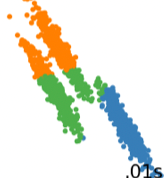

На шаге E данного алгоритма мы будем определять вероятность того, что объект принадлежит к кластеру, а на шаге M будем пересчитывать параметры функции Гаусса, чтобы подобрать наиболее подходящие кластеры для наших данных.

На анимации ниже гауссовы функции подгоняются под размеры кластеров:

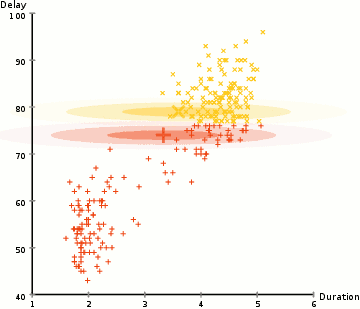

# ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ EM-КЛАСТЕРИЗАЦИЯ?

+ K-means-кластеризацию можно использовать для кластеризации документов по разным категориям, основываясь на тегах, заголовках или содержимом документа. Для этого текст документа представляется в виде вектора, а далее используется в кластеризации. Если у разных документов похожие векторы, их можно объединить в одну группу.

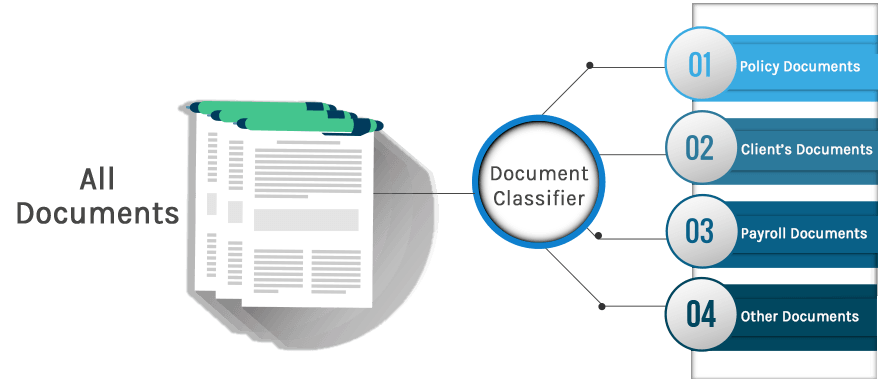

+ GMM можно использовать для сегментации изображений, например чтобы находить опухоли на снимках МРТ. Для этого мы представляем изображение в виде вектора и далее используем такое представление снимка в кластеризации.

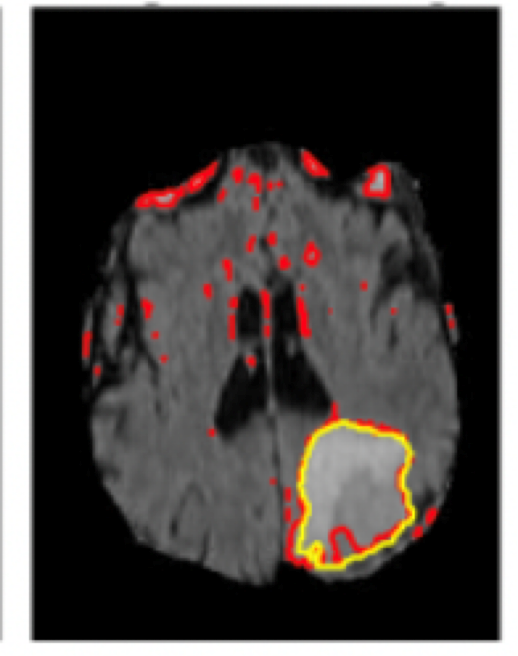

+ Используя GMM, можно анализировать временные ряды цен в периоды действия акций.

# КАК ЗАПУСТИТЬ EM-КЛАСТЕРИЗАЦИЮ?


## Запустим алгоритм на датасете покемонов и попробуем кластеризовать их по силе атаки и уровню защиты:

In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('data/pokemon.csv')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


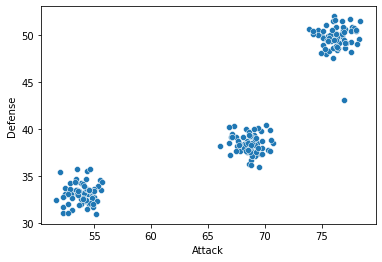

In [2]:
# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

#визуализируем
sns.scatterplot(df.Attack, df.Defense)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


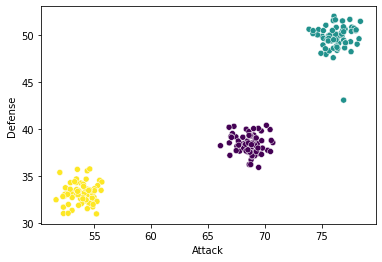

In [8]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

Основные параметры, которые необходимо задать для запуска алгоритма **GaussianMixture**:

+ n_components — количество кластеров.
+ random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

Параметров при запуске может быть больше, при желании можно почитать о них в документации sklearn:


```
from sklearn.mixture import GaussianMixture
help(GaussianMixture)
>>> Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)
```

## Визуализируем результаты:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


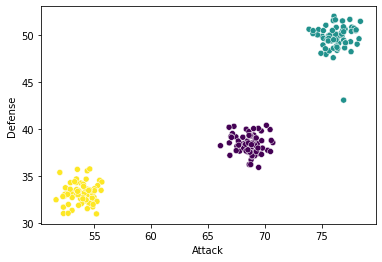

In [10]:
sns.scatterplot(df.Attack, df.Defense, c=gm_prediction)

### Алгоритм отлично справился со своей задачей и разделил данные на три кластера, которые получились однородными. Как видим, есть также одна точка-выброс, которую алгоритм не выделил в отдельный кластер.

Если выбрать количество кластеров, равное 4, получим следующий результат:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


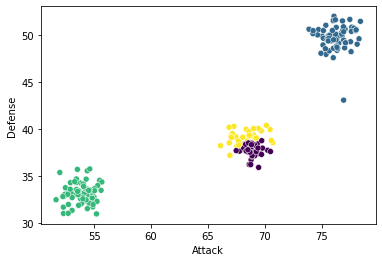

In [9]:
gm_clustering_1 = GaussianMixture(n_components=4, random_state=42)

# обучаем модель 
gm_clustering_1.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction_1 = gm_clustering_1.predict(X)

sns.scatterplot(df.Attack, df.Defense, c=gm_prediction_1)

Как мы видим, в данном случае алгоритм тоже не выделил выброс в отдельный класс, но с кластеризацией также справился отлично.

# ПРЕИМУЩЕСТВА И НЕДОСТАТКИ EM-КЛАСТЕРИЗАЦИИ

## ПРЕИМУЩЕСТВА

+ Кластеры, которые находит этот алгоритм, могут принимать форму эллипса, а не ограничиваться окружностями. K-Means является частным случаем GMM.

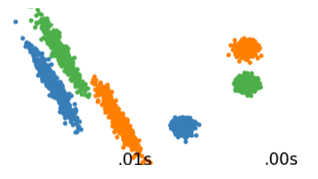

+ Если объект находится в середине двух перекрывающихся кластеров, то, в отличие от k-means, не нужно решать, к какому кластеру он принадлежит: объект может принадлежать к двум разным кластерам с разной вероятностью.

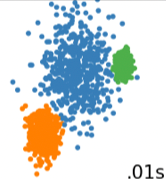

## НЕДОСТАТКИ 

+ Нужно задавать количество кластеров.
+ Чувствителен к тому, с какой точки начинается алгоритм.
+ Может медленно сходиться, т. е. искать, как оптимально описать кластеры.

## Задание 5.4

Скачайте датасет, в котором представлены цены на однокомнатные квартиры и возраст этих квартир. Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось?

+ 3

In [11]:
import pandas as pd
from sklearn.mixture import GaussianMixture
df = pd.read_csv('data/housing.csv')
gaussian_clustering = GaussianMixture(n_components=3)
# обучаем модель кластеризации и делаем предсказание для наших данных
predictions = gaussian_clustering.fit_predict(X=df[['year', 'price']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


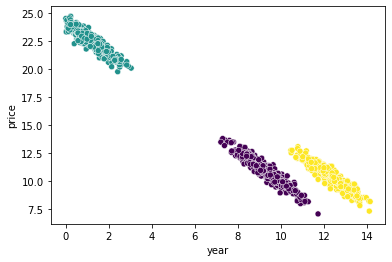

In [13]:
sns.scatterplot(df.year, df.price, c=predictions)

## Задание 5.5

Для датасета из предыдущего задания проведите кластеризацию с помощью алгоритма k-means. Какой алгоритм справился с задачей лучше?

+ GMM

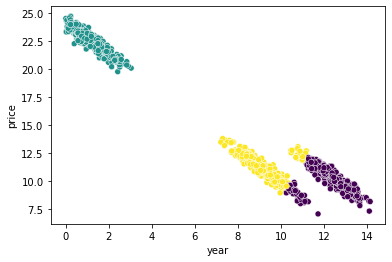

In [14]:
from sklearn.cluster import KMeans
kmeans_clustering = KMeans(n_clusters=3)
# обучим модель кластеризации и предскажем кластеры для наших данных
predictions_kmeans = kmeans_clustering.fit_predict(X=df[['year', 'price']])
# визуализируем результаты
sns.scatterplot(x=df.year, y=df.price, c=predictions_kmeans)